# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [680]:
import pandas as pd

table = pd.read_csv("data.csv")

table["age"] = table["age"].apply(lambda x: 2006 - x if x > 1000 else x)

br = table["plans_universitypast_failures"]
table = table.drop("plans_universitypast_failures", axis=1)
table["plans_university"] = br // abs(br)
table["past_failures"] = abs(br) % 10

table["traveltime"] = table["traveltime"].apply(lambda x:
    1 if 4 < x < 15 else
    2 if x < 30 else
    3 if x < 60 else 4
)


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [681]:
for column in table.columns:
    table[column] = table[column].fillna(round(table[column].mean()))


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [682]:
age_max_val = (18 - table["age"].min()) / (table["age"].max() - table["age"].min())

print(age_max_val) # нормализованное значение 18-ти лет

def normalize_data():
    for column in table.columns:
        Min = table[column].min()
        Max = table[column].max()
        table[column] = round((table[column] - Min) / (Max - Min), 2)

normalize_data()

0.42857142857142855


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [683]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

scores = pd.read_csv("scores.csv")

mse = cross_val_score(LinearRegression(), table, scores["scores"], cv=4)

print(mse)

[0.22679712 0.26292562 0.15966319 0.17528487]


### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [684]:
attendance = pd.read_csv("attendance.csv", sep=';')

for col in attendance.columns:
    attendance[col] = attendance[col].apply(lambda x: 1 if x == '+' else 0)

visits = attendance.sum(axis=1)

table["visits"] = visits

with open("school_support.txt", "r") as file:
    support = set(map(int, file.read().splitlines()))

data = [1 if i in support else 0 for i in range(1, len(table) + 1)]

table["support"] = data

normalize_data()

table.to_csv("data_copy.csv", index=False)

print(cross_val_score(LinearRegression(), table, scores["scores"], cv=4))


[0.23043148 0.2584721  0.14321004 0.17293175]


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<Axes: title={'center': 'scores'}>]], dtype=object)

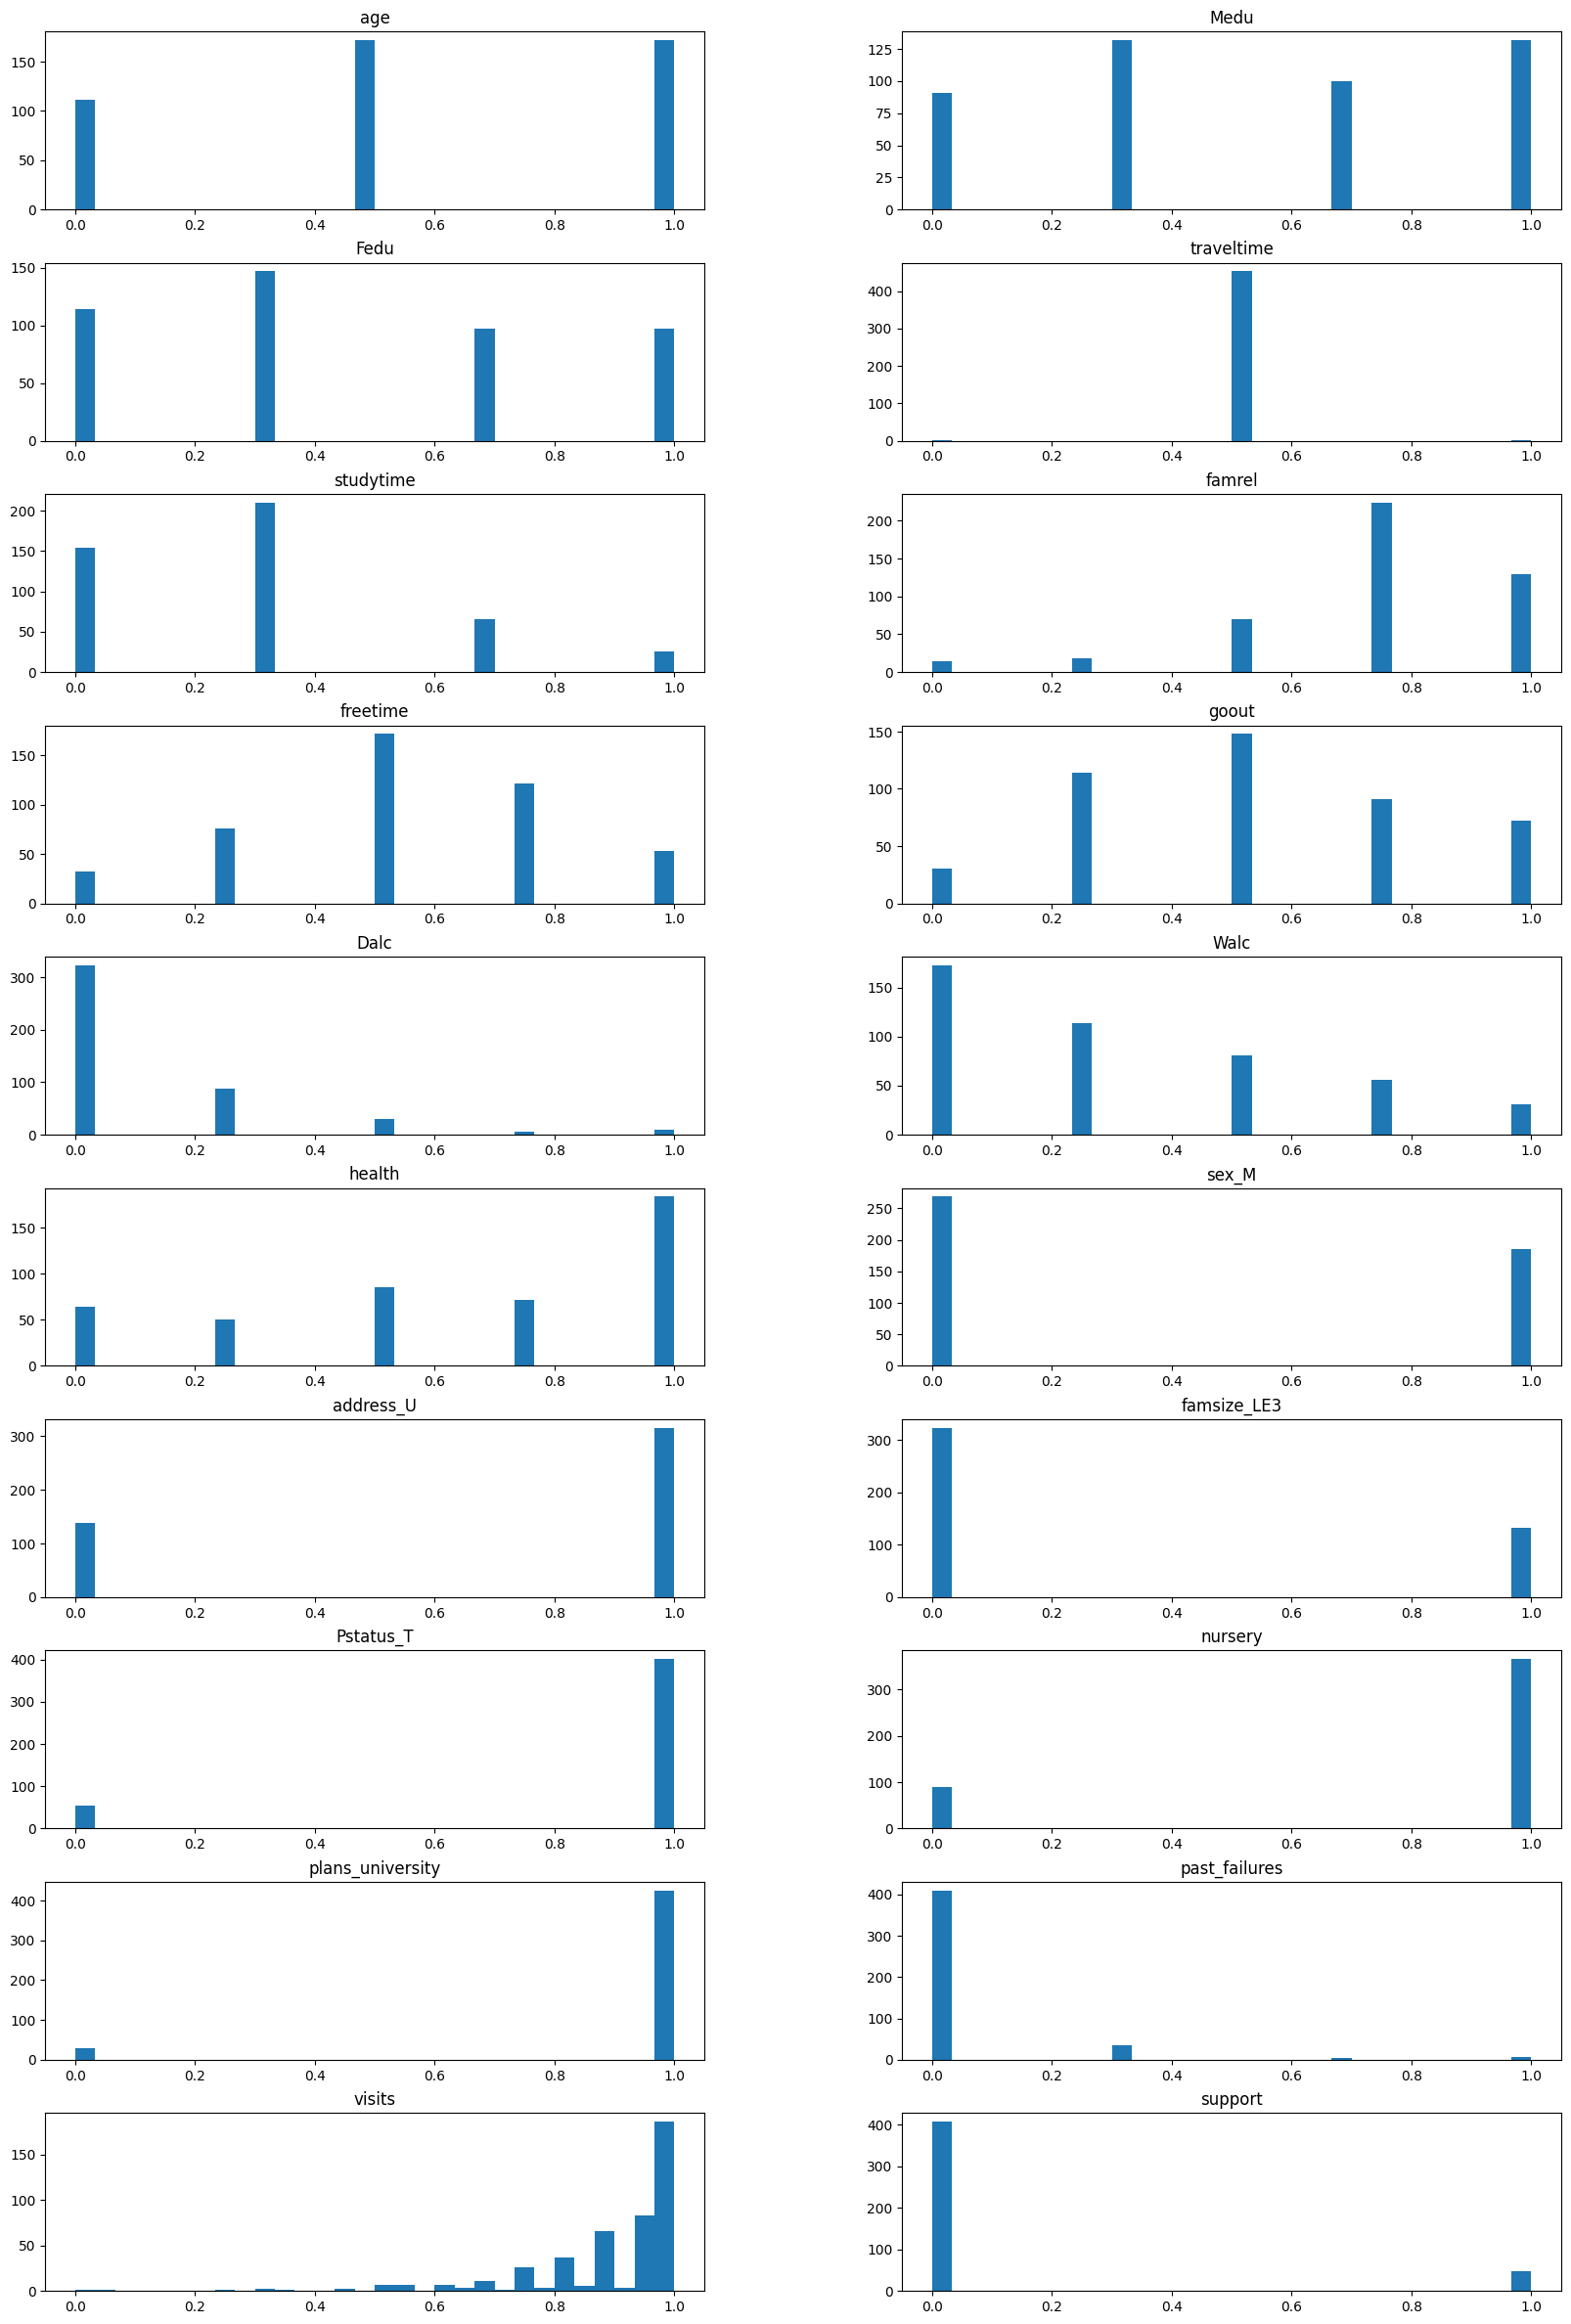

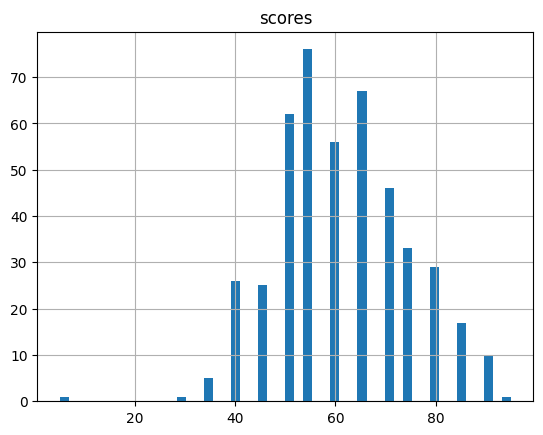

In [685]:
scores["scores"] = scores["scores"].apply(lambda x: x * 100 if x < 1.0 else x)

to_del = scores[scores["scores"] == 0].index
scores = scores.drop(to_del)
table = table.drop(to_del)

to_del = table[table["age"] > age_max_val].index
table = table.drop(to_del)
scores = scores.drop(to_del)

to_del = table[table["Medu"] == 0].index
table = table.drop(to_del)
scores = scores.drop(to_del)

to_del = table[table["Fedu"] == 0].index
table = table.drop(to_del)
scores = scores.drop(to_del)

normalize_data()

table.hist(figsize=(20, 30), bins=30, grid=False, layout=(10, 2))
scores.hist(bins=50)

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

(array([155.,  59.,  41.,  26.,  17.,  20.,  15.,  16.,  12.,  12.,   7.,
         11.,   6.,  10.,   7.,   5.,   6.,   1.,   3.,   3.,   1.,   0.,
          2.,   2.,   0.,   1.,   1.,   2.,   2.,   0.,   0.,   1.,   1.,
          1.,   2.,   2.,   1.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([1.81912533e-06, 2.11457293e-03, 4.22732673e-03, 6.34008053e-03,
        8.45283433e-03, 1.05655881e-02, 1.26783419e-02, 1.47910957e-02,
        1.69038495e-02, 1.90166033e-02, 2.11293571e-02, 2.32421109e-02,
        2.53548647e-02, 2.74676185e-02, 2.95803723e-02, 3.16931261e-02,
        3.38058799e-02, 3.5918

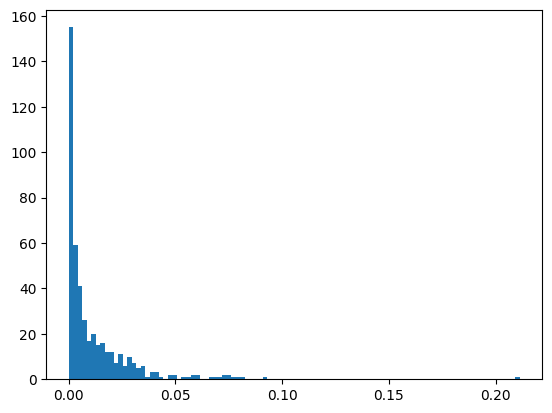

In [686]:
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np
# regression = linear_model.LinearRegression().fit(data, scores) #create model and train it

model = LinearRegression()
model.fit(table, scores["scores"])

guess = model.predict(table)

error = ((guess - scores["scores"]) / 100) ** 2
error_ser = pd.Series(error, index=table.index)
to_del = error_ser[error_ser > 0.05].index
table.drop(to_del)
scores.drop(to_del)

plt.hist(error, bins=100)

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [687]:
# Your code here
# ...